In [72]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers , initializers
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

import tensorflow as tf

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
pip install tensorflow

In [84]:
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

In [85]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        
    height_shift_range = 0.1,       
    horizontal_flip = True,         
    rescale = 1./255,               
    validation_split = 0.2          
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               
    validation_split = 0.2          
)

In [86]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           
    target_size = (48, 48),          
    batch_size = 64,                 
    color_mode = "grayscale",        
    class_mode = "categorical",      
    subset = "training"              
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            
    target_size = (48, 48),          
    batch_size = 64,                 
    color_mode = "grayscale",        
    class_mode = "categorical",      
    subset = "validation"            
)

Found 22968 images belonging to 7 classes.
Found 1430 images belonging to 7 classes.


# CNN modelling

In [87]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add a convolutional layer
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a dense layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
#checkpoint_callback = ModelCheckpoint(
#    filepath='model_weights.weights.h5',
#    monitor='val_accuracy',
#    save_best_only=True,
#    save_weights_only=True,
#    mode='max',
#    verbose=1
#)

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    restore_best_weights=False)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=22968 // 64,
    validation_data=validation_generator,
    validation_steps= 1430 // 64,
    epochs=100,
    callbacks=early_stopping
)

Epoch 1/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.6409 - loss: 0.9646 - val_accuracy: 0.6470 - val_loss: 0.9659
Epoch 2/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.6875 - loss: 0.8208 - val_accuracy: 0.5000 - val_loss: 1.2162
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.6429 - loss: 0.9537 - val_accuracy: 0.6335 - val_loss: 0.9791
Epoch 4/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.5938 - loss: 0.9398 - val_accuracy: 0.6364 - val_loss: 0.7090
Epoch 5/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.6454 - loss: 0.9490 - val_accuracy: 0.6371 - val_loss: 0.9945
Epoch 6/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.6562 - loss: 0.9975 - val_accuracy: 0.5909 - val_loss: 0.8894
Epoch 7/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.6506 - loss: 0.9413 - val_accuracy: 0.6605 - val_loss: 0.9415
Epoch 8/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.5312 - loss: 1.0547 - val_accuracy: 0.6818 - val_loss: 0.8225
Epoch 9/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.6544 - loss: 0.9289 - val_accuracy: 0.6428 - val_loss: 0.9544
Epoch 10/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7344 - loss: 0.8258 - val_ac

# Evalution

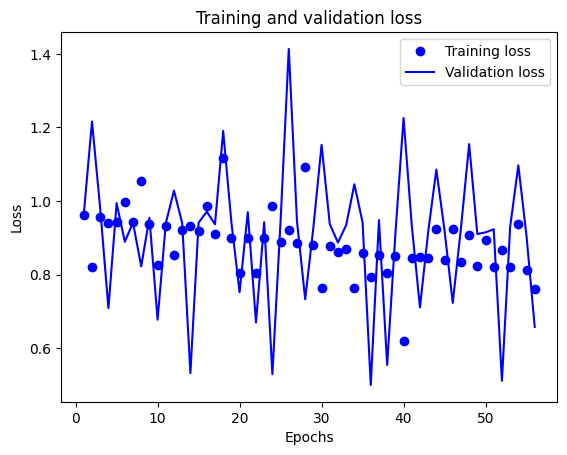

In [91]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


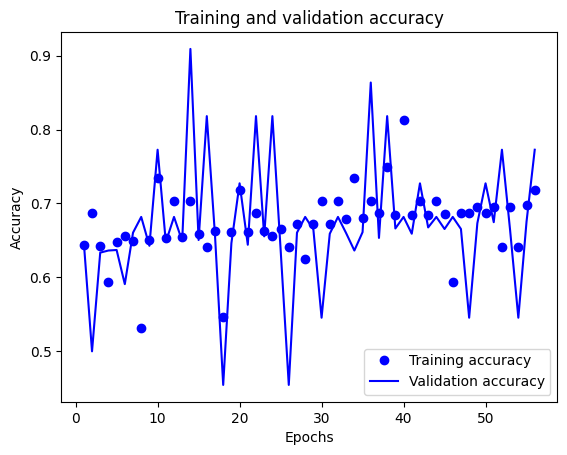

In [92]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


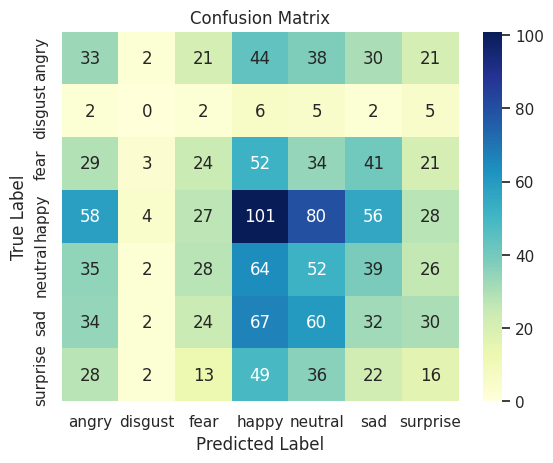

In [93]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()